In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv("/content/dermatology_database_1.csv")
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Preprocess the data
data['age'] = pd.to_numeric(data['age'], errors='coerce')# Convert 'age' to numeric
data['age'].fillna(data['age'].median(), inplace=True)# Fill missing values with median age

<ipython-input-5-cfdc2a0b747a>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)# Fill missing values with median age


In [ ]:
# Separate features and target
X = data.drop(columns=['class'])
y = data['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Train and evaluate SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        23
           2       0.41      0.92      0.56        12
           3       1.00      0.93      0.97        15
           4       0.00      0.00      0.00        10
           5       1.00      0.10      0.18        10
           6       0.57      1.00      0.73         4

    accuracy                           0.72        74
   macro avg       0.65      0.66      0.57        74
weighted avg       0.72      0.72      0.65        74



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Train and evaluate Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.91      0.83      0.87        12
           3       1.00      1.00      1.00        15
           4       0.82      0.90      0.86        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.96        74
   macro avg       0.95      0.96      0.95        74
weighted avg       0.96      0.96      0.96        74



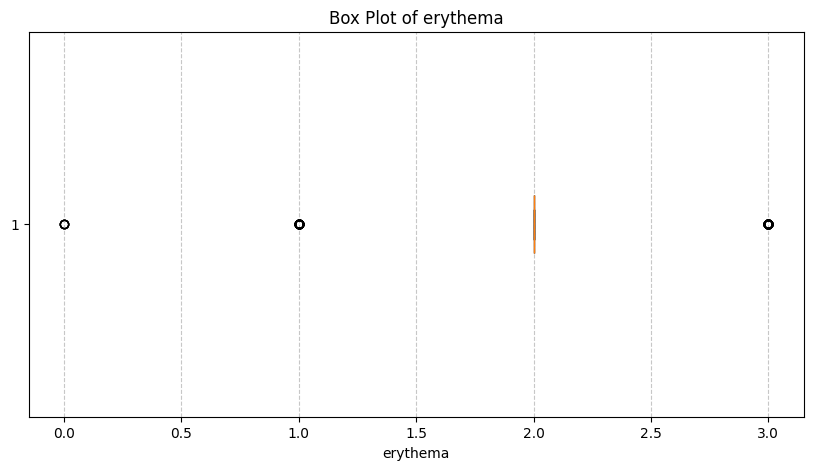

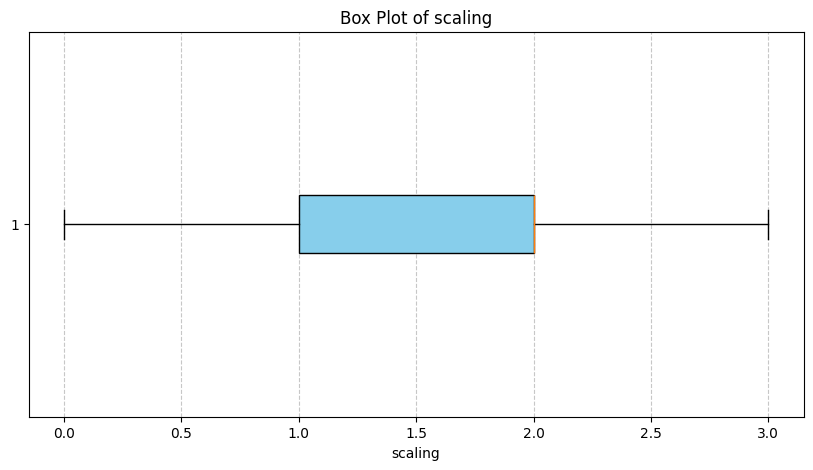

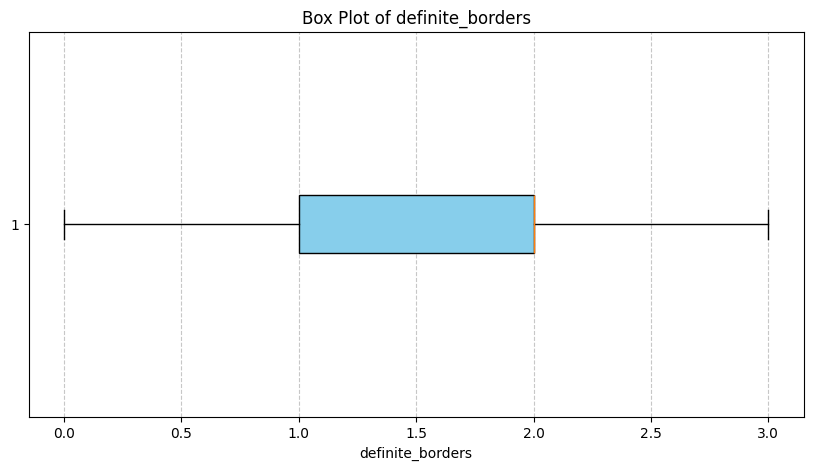

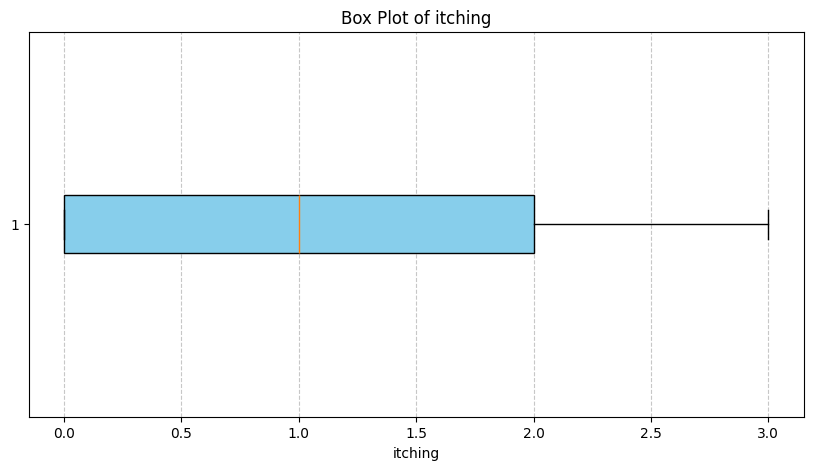

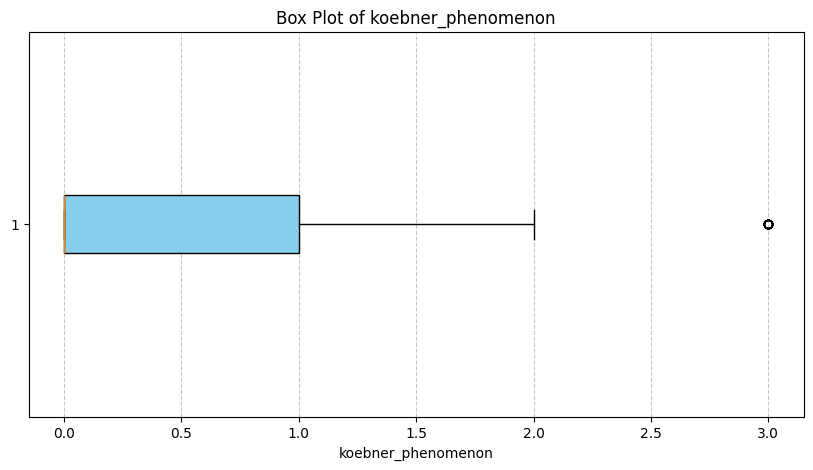

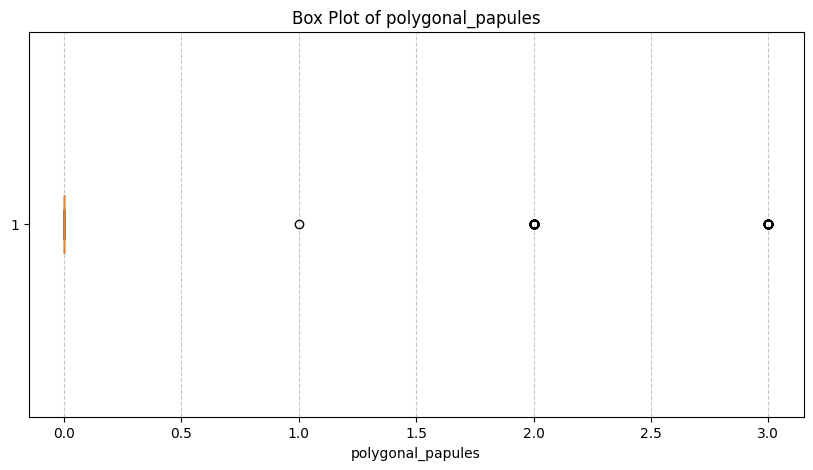

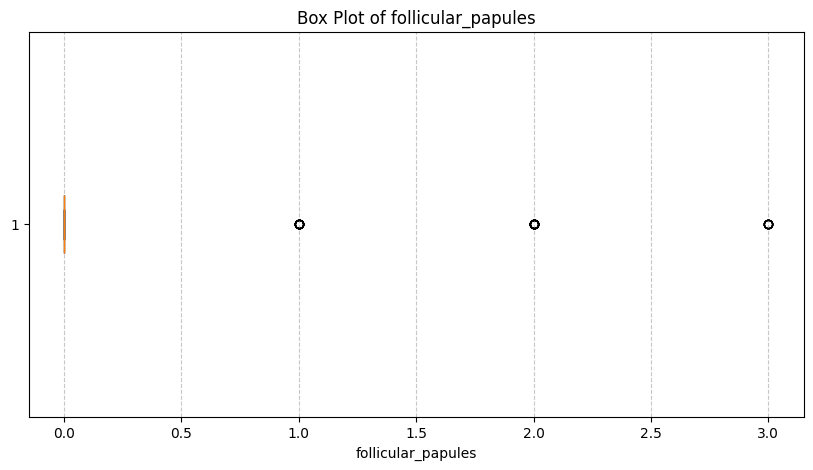

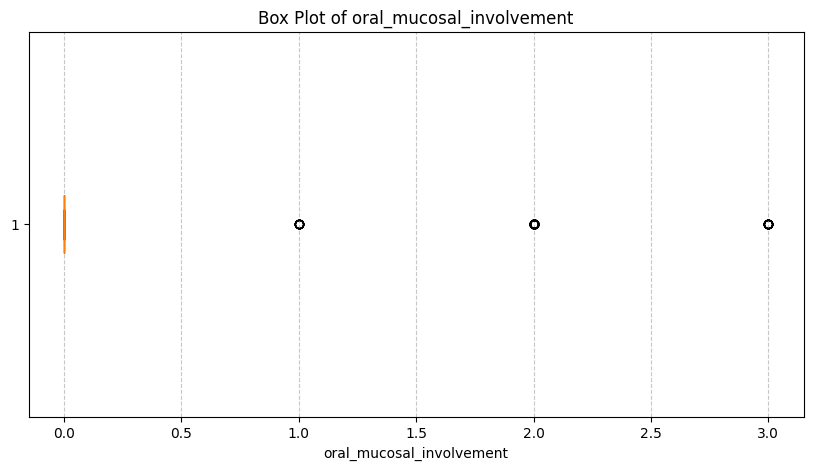

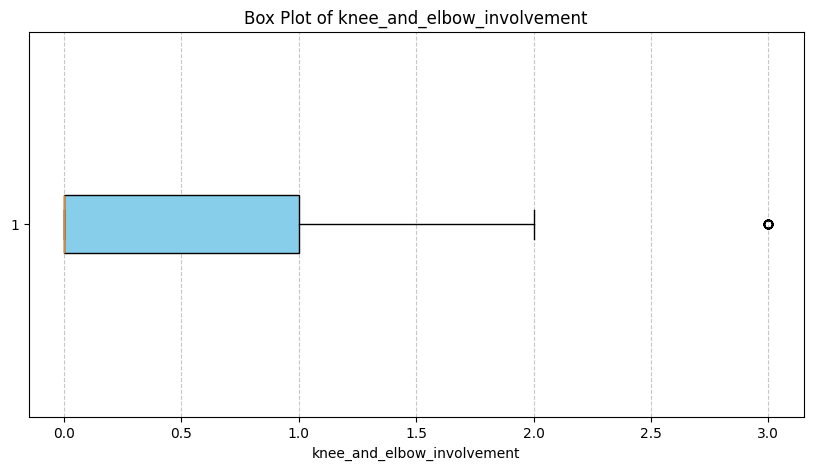

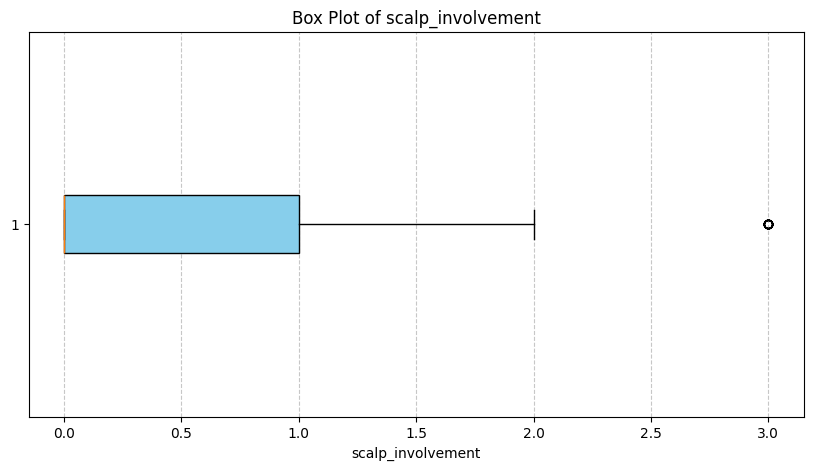

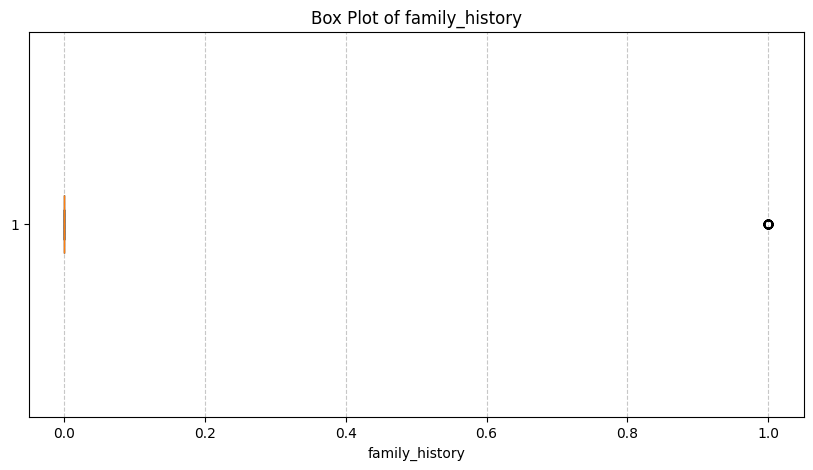

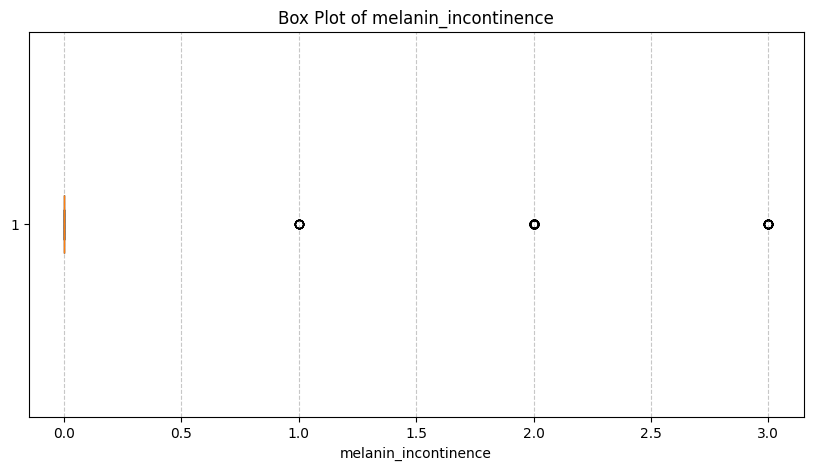

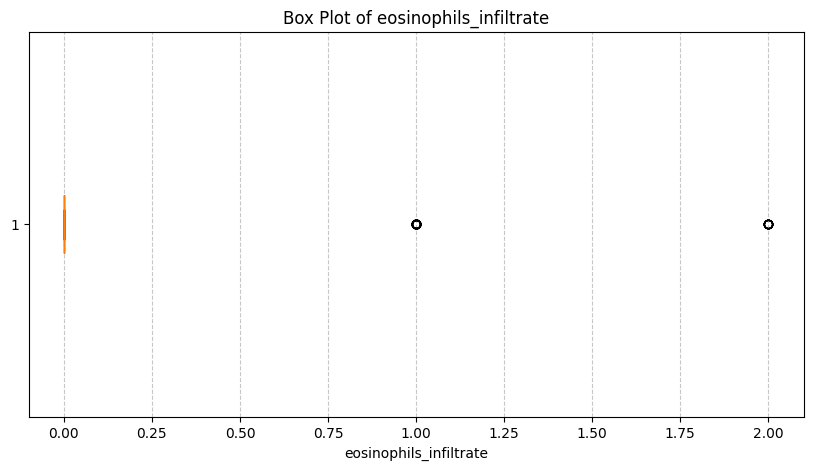

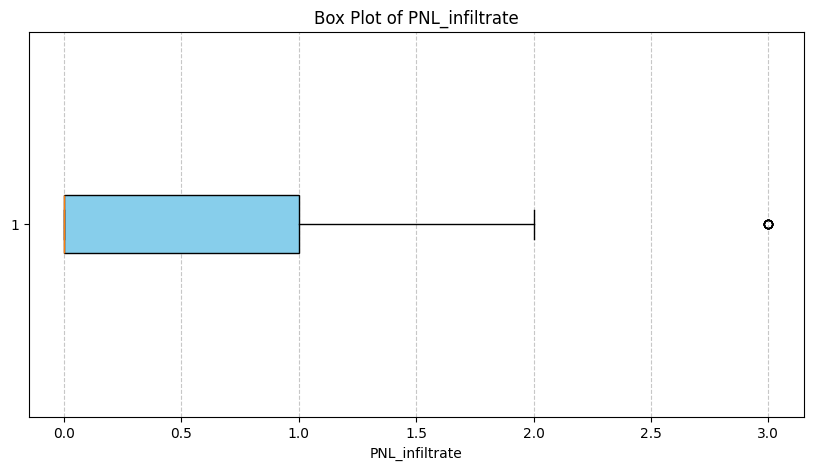

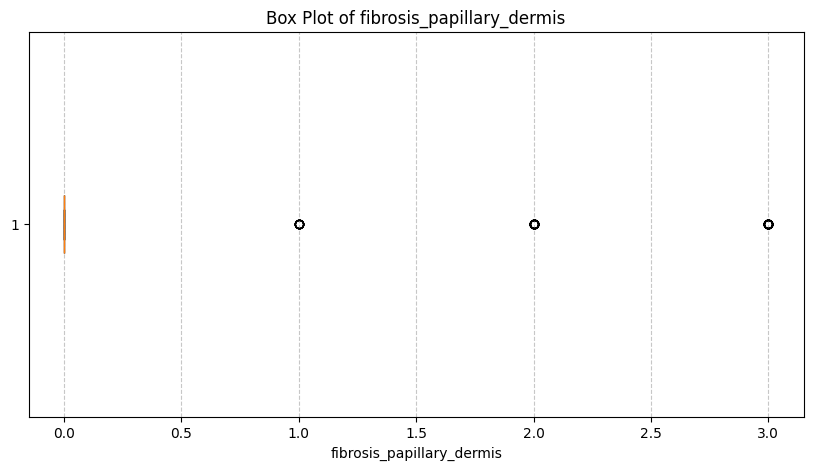

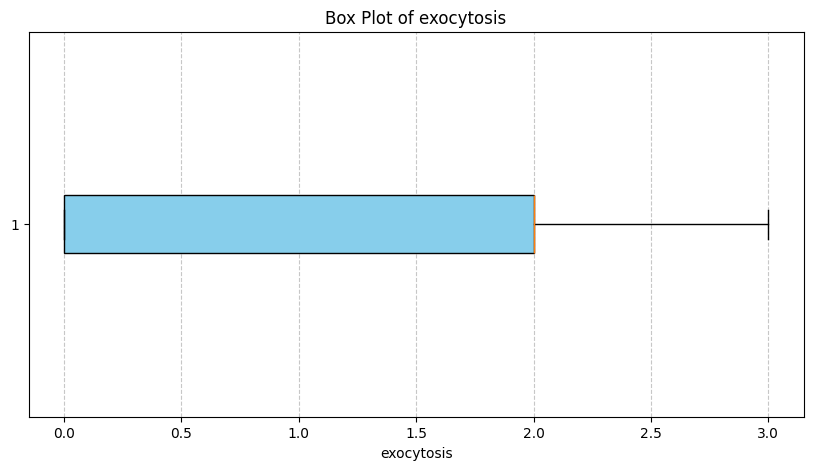

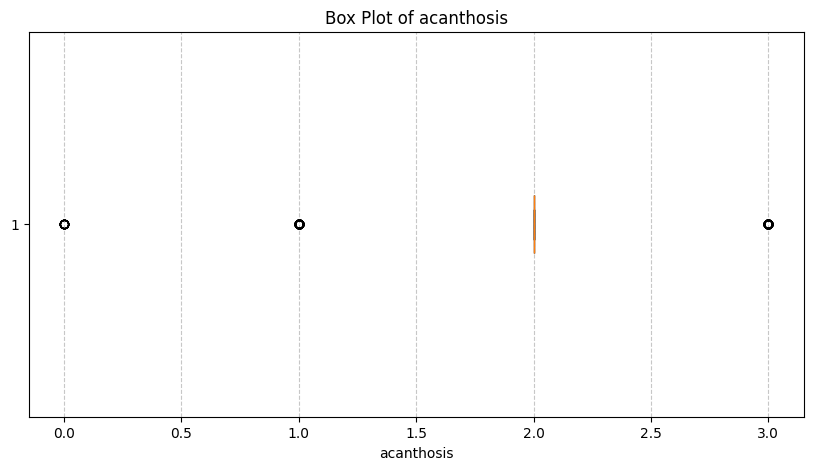

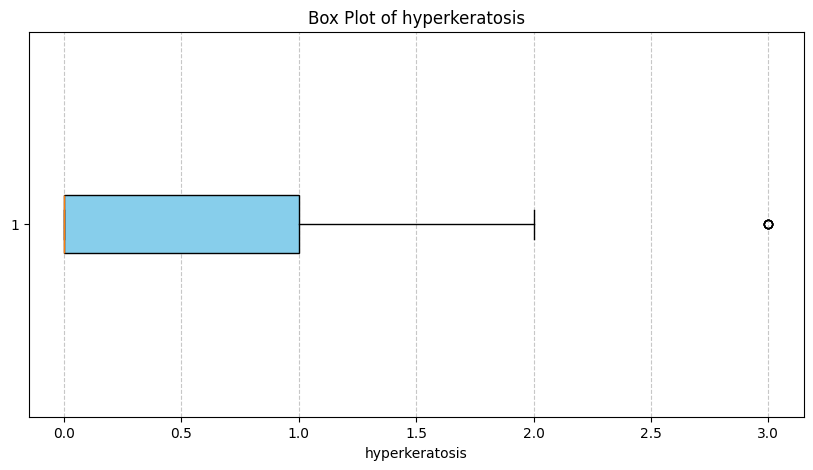

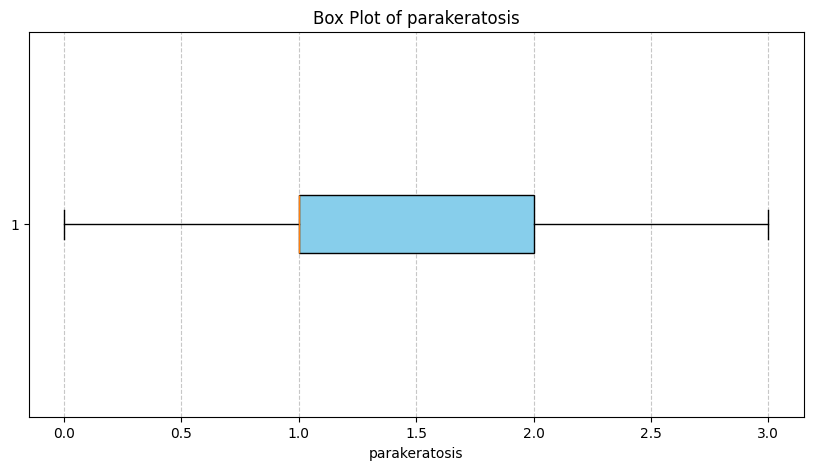

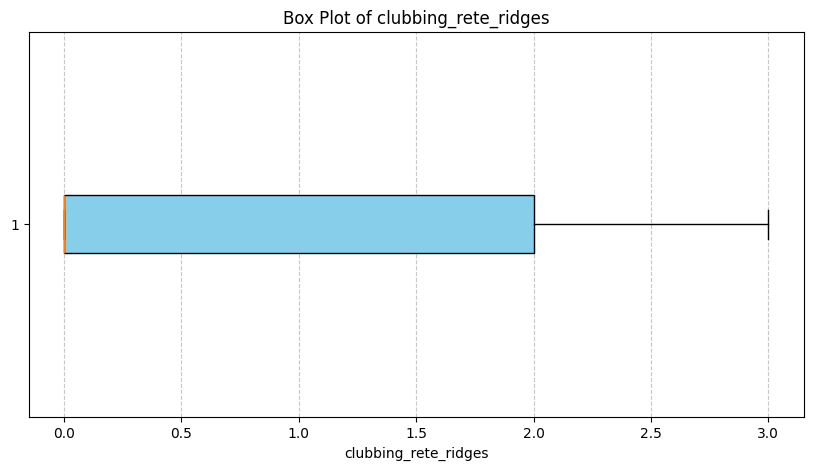

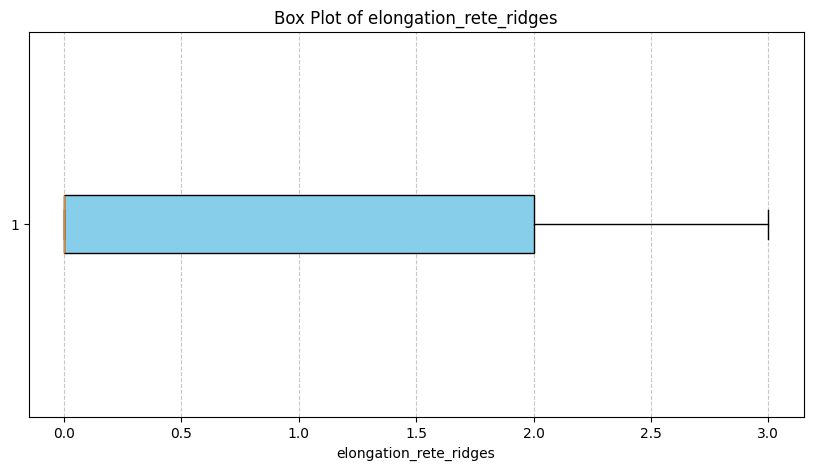

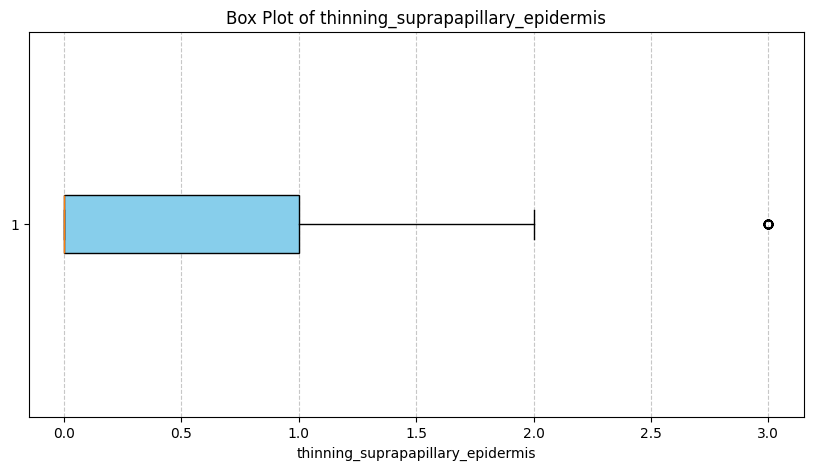

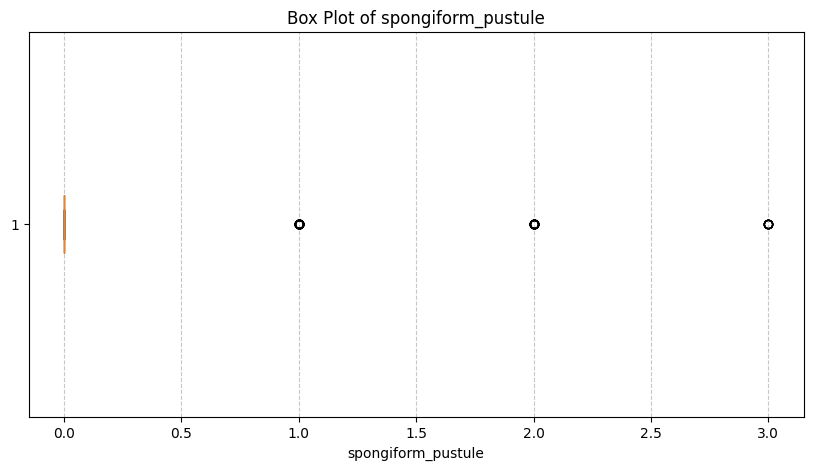

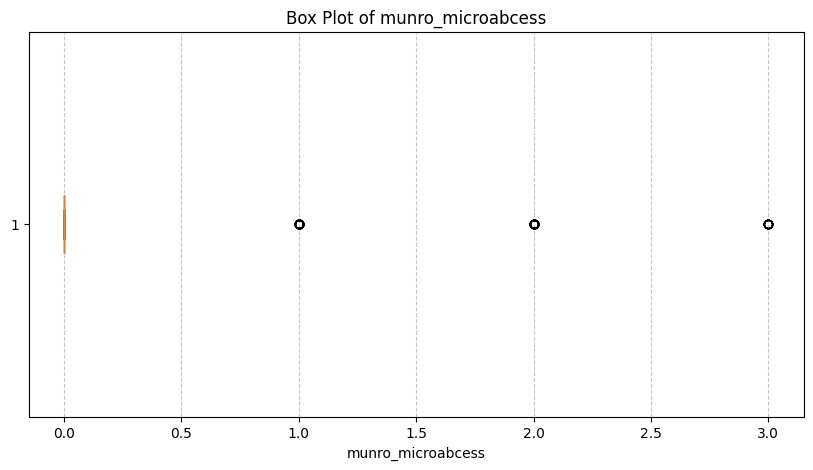

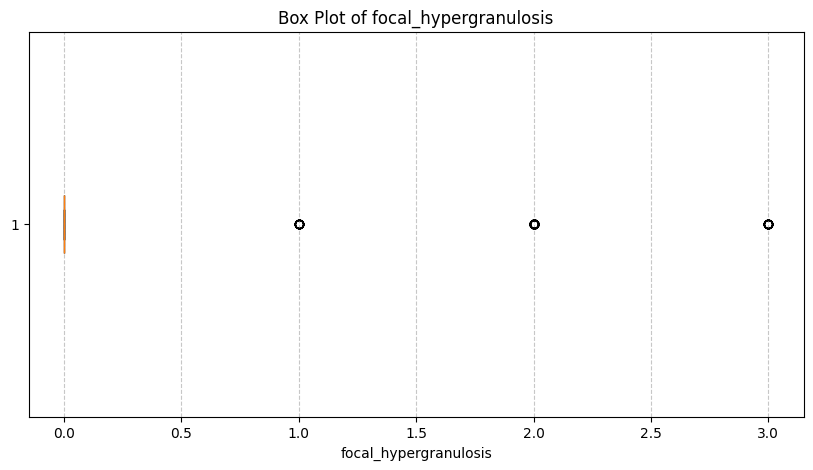

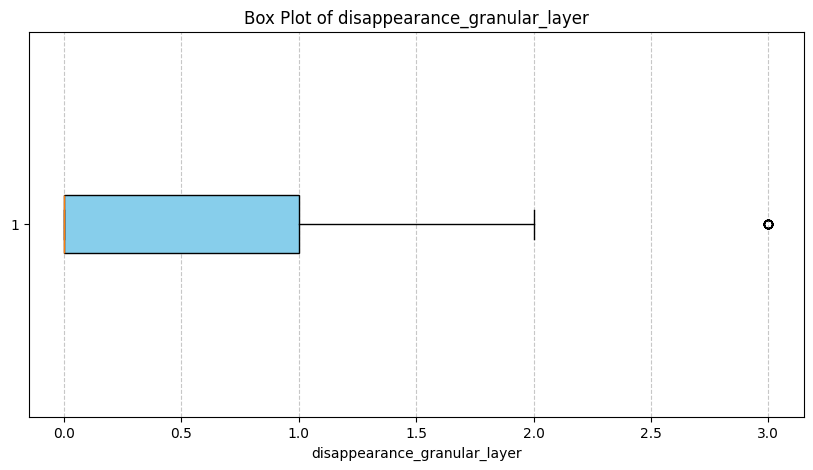

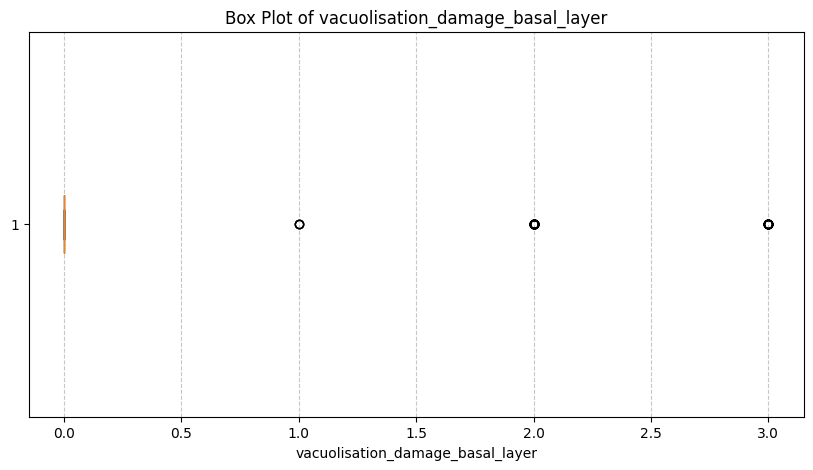

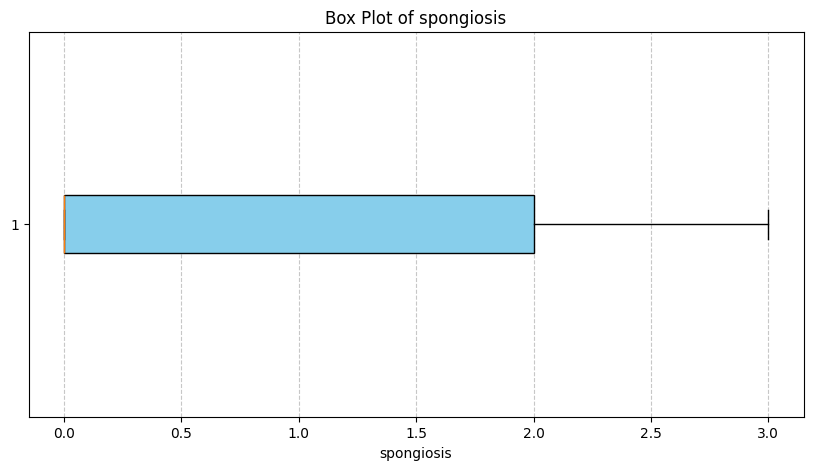

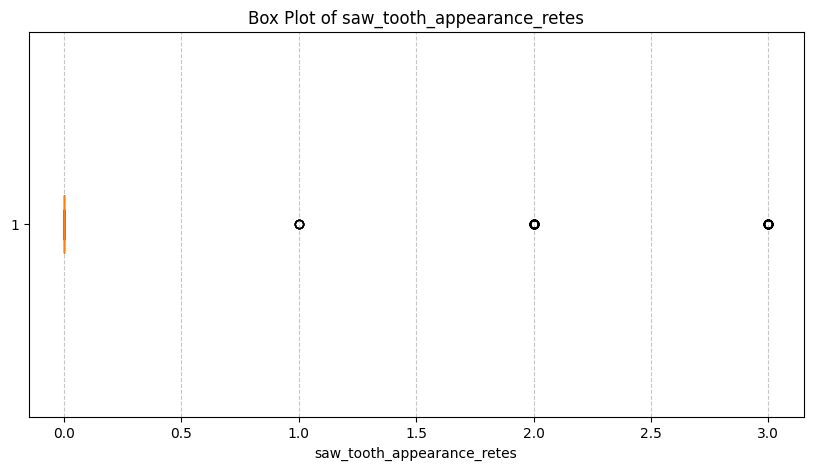

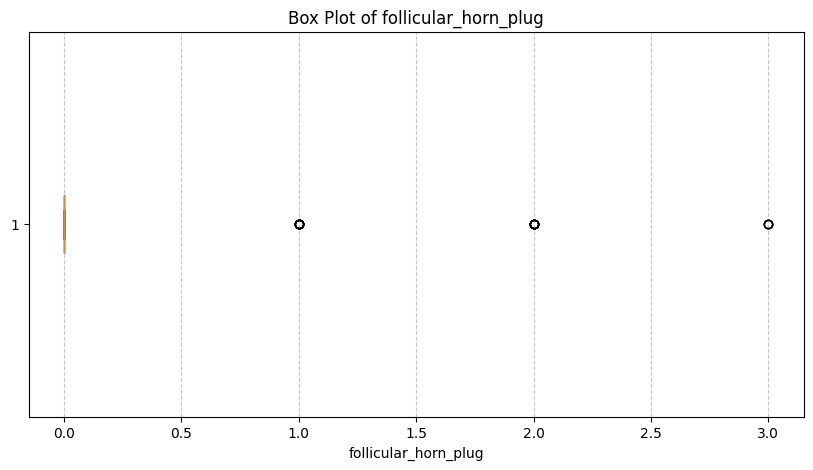

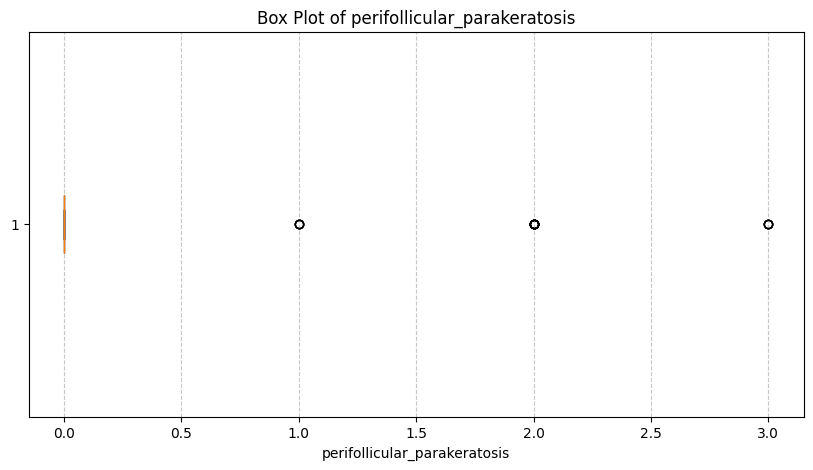

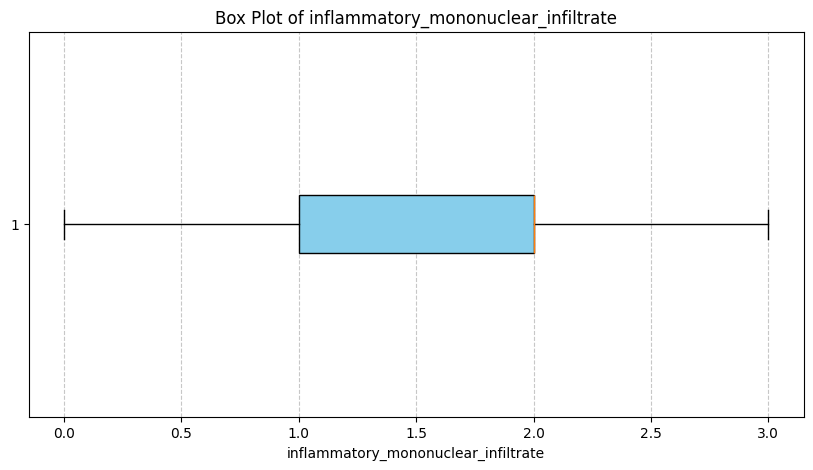

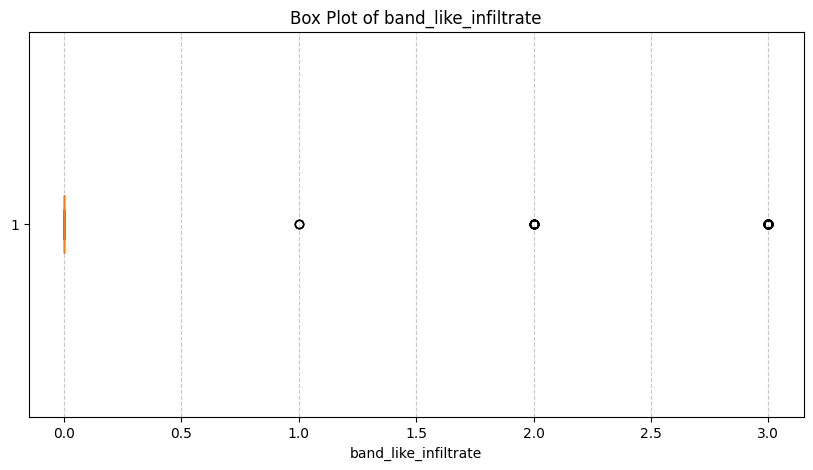

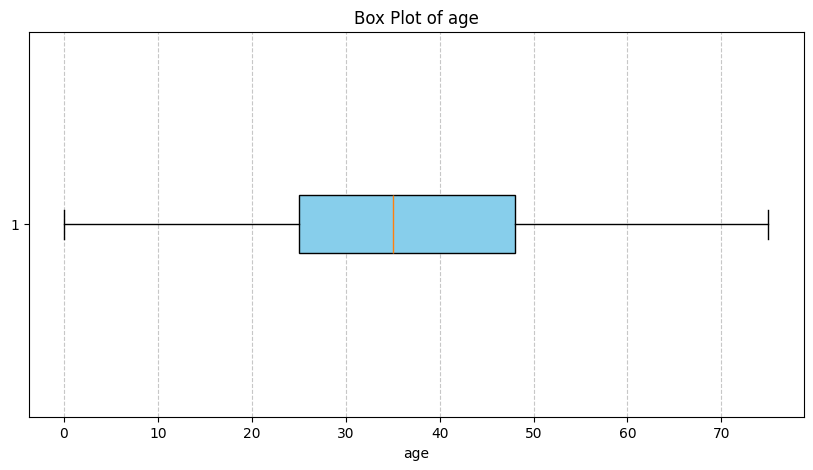

In [ ]:
import matplotlib.pyplot as plt

# Plot box plots for each numerical column to identify outliers
numerical_columns = X.columns
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot(X[col], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()


In [ ]:
#remove the outliers and again train SVM, RF find the results.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Calculate IQR for each numerical feature
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outlier detection
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter out outliers
data_no_outliers = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

# Separate features and target after removing outliers
X_no_outliers = data_no_outliers.drop(columns=['class'])
y_no_outliers = data_no_outliers['class']

# Split the cleaned data into training and testing sets without stratification
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42, stratify=None # Change to None
)

# Train and evaluate SVM on data without outliers
svm_model_no_outliers = SVC(random_state=42)
svm_model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
svm_predictions_no_outliers = svm_model_no_outliers.predict(X_test_no_outliers)
print("SVM Classification Report (After Removing Outliers):")
print(classification_report(y_test_no_outliers, svm_predictions_no_outliers))

# Train and evaluate Random Forest on data without outliers
rf_model_no_outliers = RandomForestClassifier(random_state=42)
rf_model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
rf_predictions_no_outliers = rf_model_no_outliers.predict(X_test_no_outliers)
print("Random Forest Classification Report (After Removing Outliers):")
print(classification_report(y_test_no_outliers, rf_predictions_no_outliers))

SVM Classification Report (After Removing Outliers):
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         4
           4       0.33      1.00      0.50         2

    accuracy                           0.33         6
   macro avg       0.17      0.50      0.25         6
weighted avg       0.11      0.33      0.17         6



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Classification Report (After Removing Outliers):
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



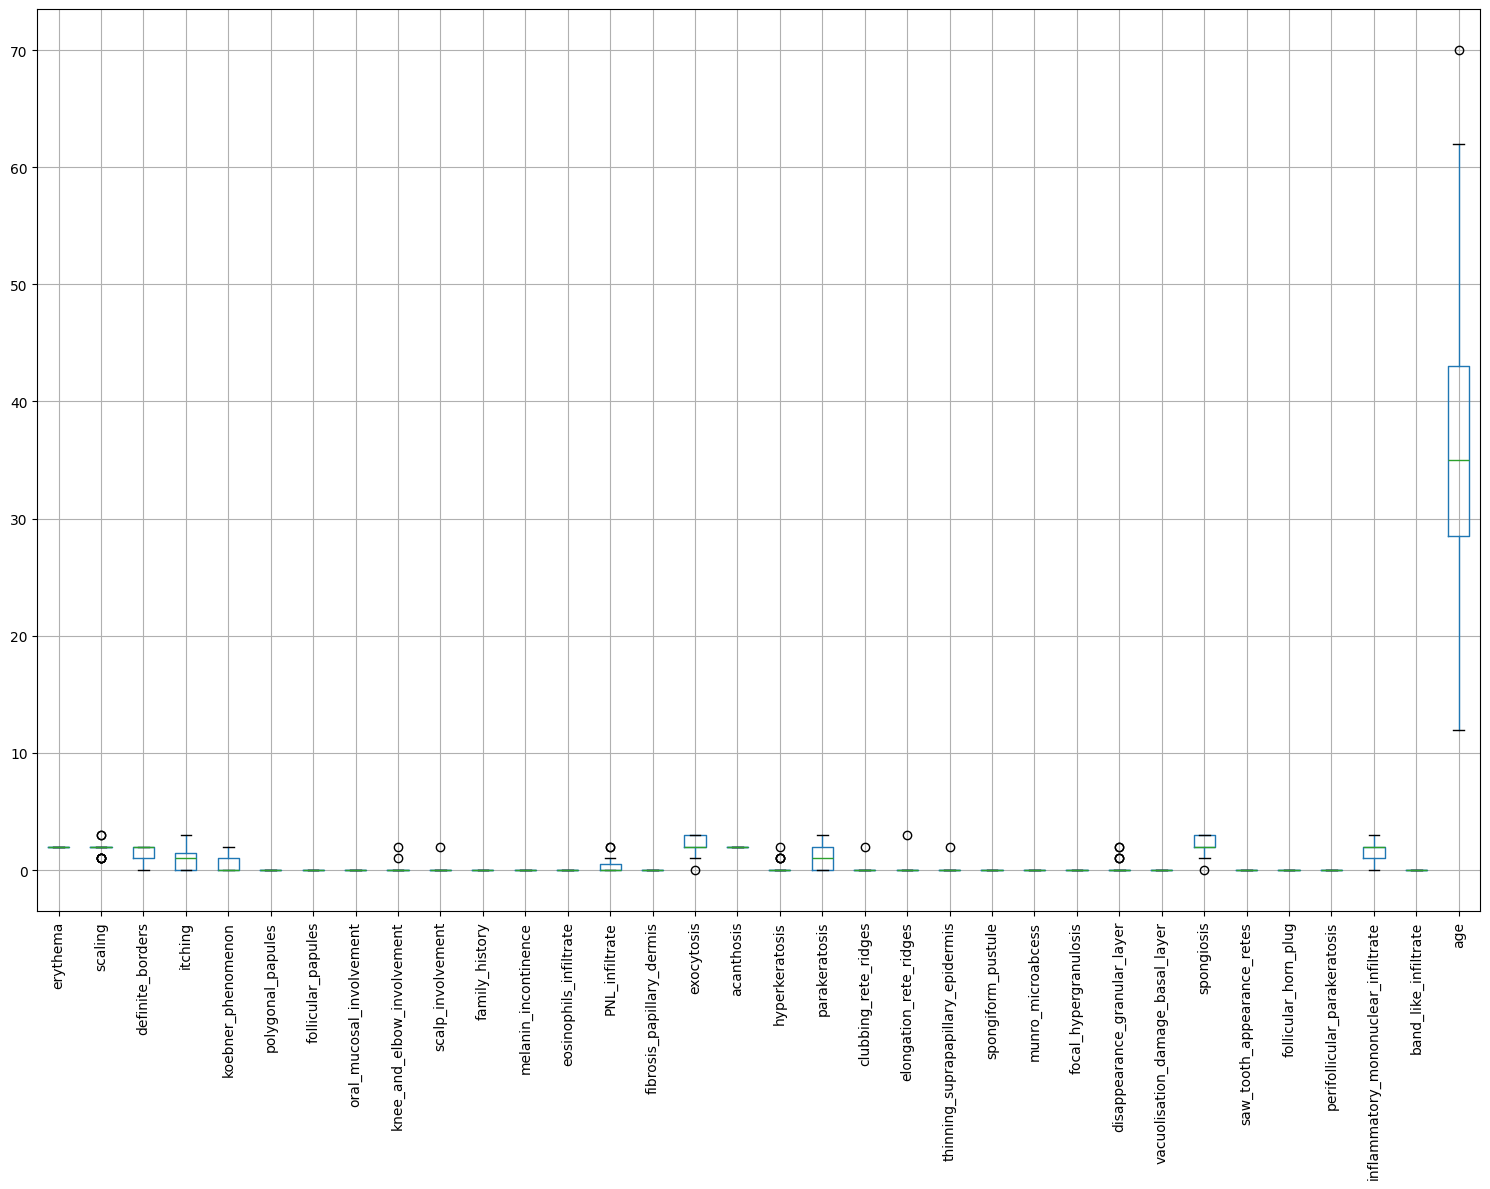

In [ ]:
df_no_outliers = pd.DataFrame(X_no_outliers, columns=data.columns[:-1])
plt.figure(figsize=(15, 12))
df_no_outliers.boxplot(rot=90)
plt.tight_layout()
plt.show()

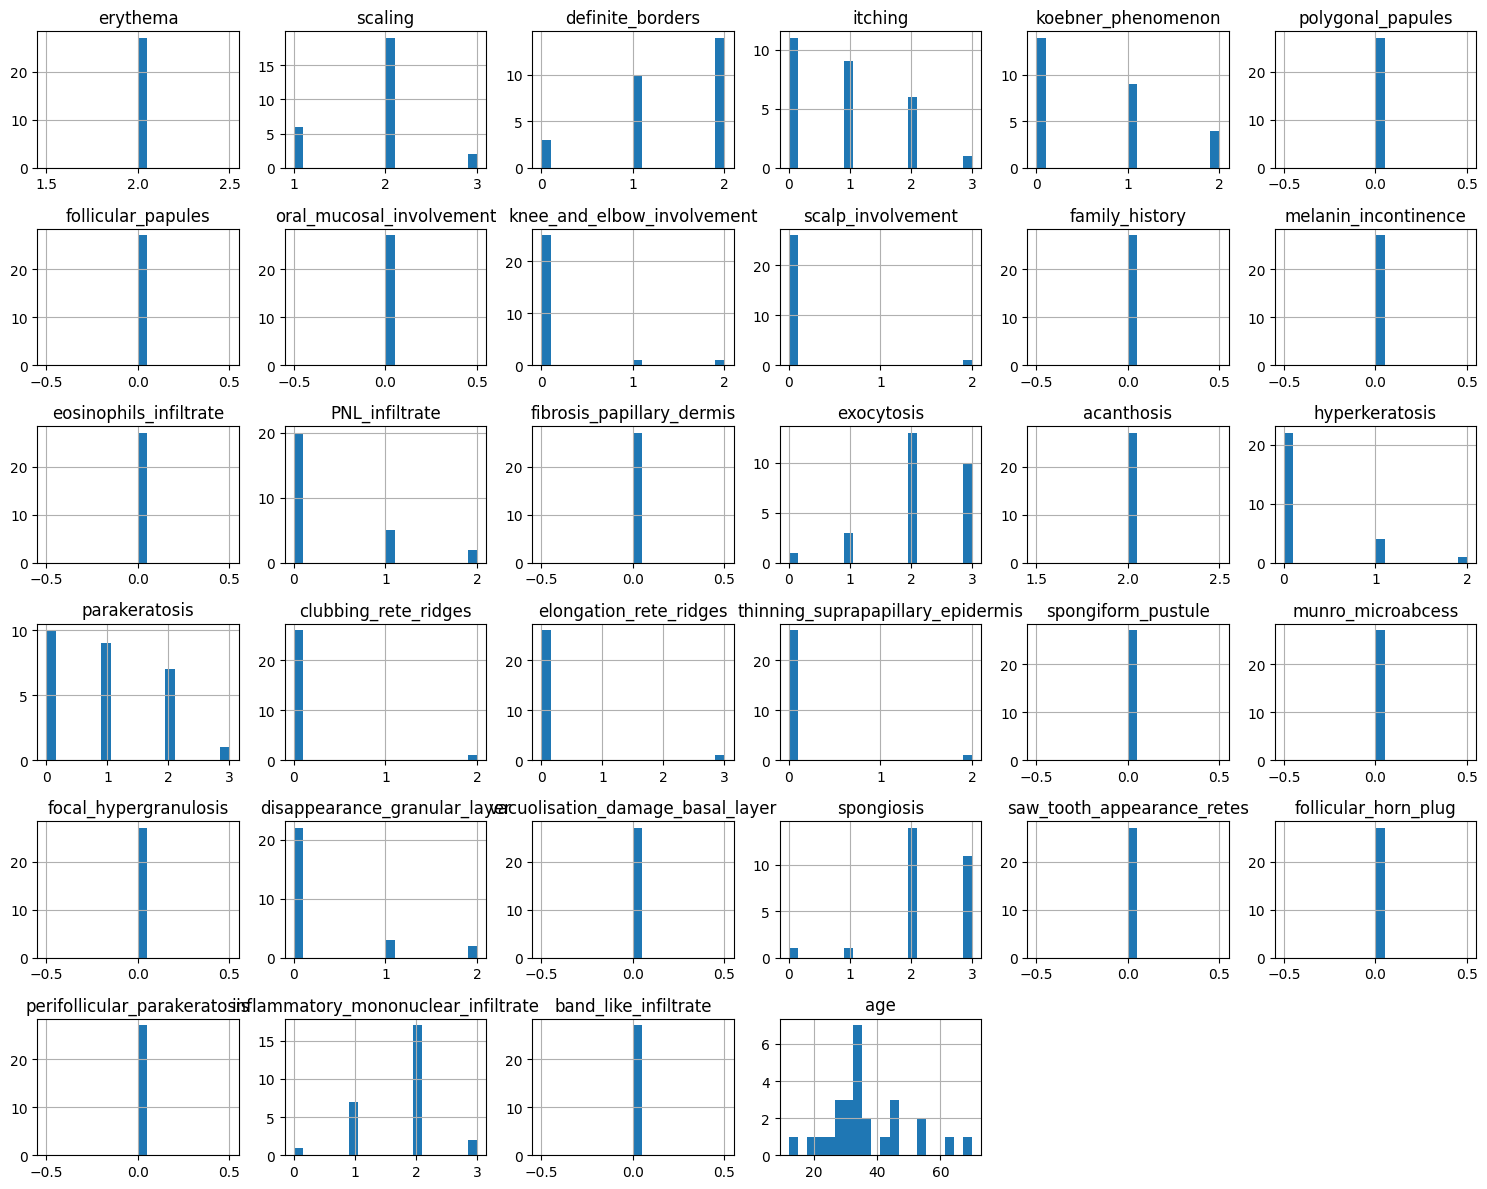

In [ ]:
#Plot histograms for each column of above data.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

df_no_outliers = pd.DataFrame(X_no_outliers, columns=data.columns[:-1])
df_no_outliers.hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()